In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [53]:
data=pd.read_csv("diamonds.csv")

In [54]:
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [56]:
data.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [57]:
data.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [58]:
data.groupby(by="price").count()

,index,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


In [20]:
a=len(data)

53940

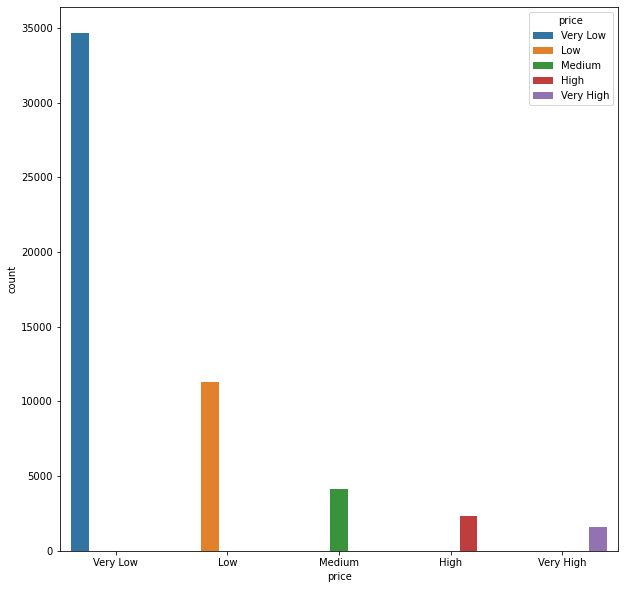

In [59]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
sns.countplot(x="price", data=data, hue="price")
plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["price"]) 
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,Label
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,4
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,4
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,4
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,4
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,4


In [62]:
data["Label"].value_counts()

4    34663
1    11271
2     4109
0     2308
3     1589
Name: Label, dtype: int64

In [63]:
categories = list(label_encoder.inverse_transform([0, 1, 2, 3, 4]))
categories

['High', 'Low', 'Medium', 'Very High', 'Very Low']

In [64]:
clases = list(set(data.price))
data.drop(["index","price","cut","color","clarity"], axis=1, inplace=True)

In [65]:
data.head()

,carat,depth,table,x,y,z,Label
0,0.23,61.5,55.0,3.95,3.98,2.43,4
1,0.21,59.8,61.0,3.89,3.84,2.31,4
2,0.23,56.9,65.0,4.05,4.07,2.31,4
3,0.29,62.4,58.0,4.20,4.23,2.63,4
4,0.31,63.3,58.0,4.34,4.35,2.75,4


In [66]:
X, y = data.iloc[: , :-1], data.iloc[: , -1]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8485016187498271
Accuracy of test: 0.8448401775181169


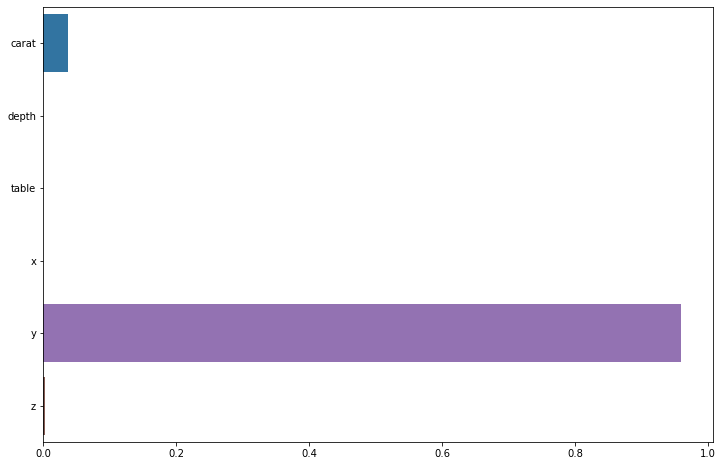

In [70]:
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [86]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
f1_score(y_test, pred, average='weighted', labels=np.unique(pred),zero_division="warn")
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       769
           1       0.69      0.88      0.77      3663
           2       0.45      0.45      0.45      1357
           3       0.52      0.69      0.59       517
           4       0.98      0.94      0.96     11495

    accuracy                           0.84     17801
   macro avg       0.53      0.59      0.55     17801
weighted avg       0.82      0.84      0.83     17801



C:\Users\gnl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.5272260706920726
Recall = 0.5918371856392943
Accuracy = 0.8448401775181169
F1 Score = 0.5547412755776912


C:\Users\gnl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
